In [1]:
"""
  Only execute the commented code in Google Colaboratory to download the dataset in a zip file
"""
# ! gdown --id 1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
# from zipfile import ZipFile
# with ZipFile("/content/EuroSAT_dataset.zip", 'r') as zip:
#   zip.extractall("/content/dataset")

Downloading...
From: https://drive.google.com/uc?id=1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
To: /content/EuroSAT_dataset.zip
100% 69.8M/69.8M [00:00<00:00, 190MB/s]


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import tensorflow.keras

from matplotlib import pyplot as plt
import numpy as np

In [44]:
size = 64
batch_size = 15
base_dir = "/content/dataset/EuroSAT_dataset"

train_data_dir = base_dir
validation_data_dir = train_data_dir
LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]

In [45]:
# DATA SOURCE --------------------------------------------------

train_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255,
        rotation_range = 180,
        zoom_range = 0.15,
        horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "training",
        classes = LABELS,
        seed = 2022
)

validation_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "validation",
        classes = LABELS,
        seed = 2022
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


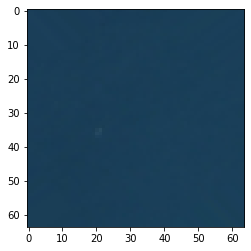

In [46]:
# Visualization of the first image of the first batch
image = np.array(train_generator[0][0][0], dtype='float')
plt.imshow(image)
plt.show()

In [47]:
# MODEL --------------------------------------------------


# Convolutional Layers

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))

model.add(Conv2D(64, (5, 5), activation='relu'))


# Dense Layers

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(learning_rate=0.5),
              metrics=['accuracy'])

In [48]:
# TRAINING --------------------------------------------------

epochs = 25

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8, restore_best_weights=True)

histogram = model.fit(
        train_generator,
        validation_data = validation_generator,
        epochs=epochs,
        callbacks = [early_stop]
)

Epoch 1/25
1067/1067 [==============================] - 41s 37ms/step - loss: 1.6740 - accuracy: 0.3423 - val_loss: 1.1700 - val_accuracy: 0.5502
Epoch 2/25
1067/1067 [==============================] - 39s 37ms/step - loss: 1.0421 - accuracy: 0.6265 - val_loss: 0.8484 - val_accuracy: 0.6950
Epoch 3/25
1067/1067 [==============================] - 39s 37ms/step - loss: 0.8476 - accuracy: 0.7001 - val_loss: 0.9134 - val_accuracy: 0.6750
Epoch 4/25
1067/1067 [==============================] - 39s 37ms/step - loss: 0.7468 - accuracy: 0.7305 - val_loss: 0.6256 - val_accuracy: 0.7797
Epoch 5/25
1067/1067 [==============================] - 39s 37ms/step - loss: 0.6756 - accuracy: 0.7545 - val_loss: 0.6732 - val_accuracy: 0.7565
Epoch 6/25
1067/1067 [==============================] - 39s 36ms/step - loss: 0.6174 - accuracy: 0.7826 - val_loss: 0.5249 - val_accuracy: 0.8117
Epoch 7/25
1067/1067 [==============================] - 39s 37ms/step - loss: 0.5704 - accuracy: 0.7977 - val_loss: 0.5167 -

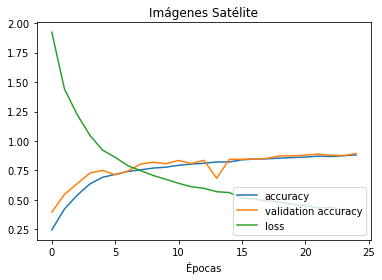

In [19]:
# VISUALIZATION OF TRAINING METRICS --------------------------------------------------

plt.plot(histogram.history['accuracy'], label='accuracy')
plt.plot(histogram.history['val_accuracy'], label='validation accuracy')
plt.plot(histogram.history['loss'], label='loss')

plt.title('Imágenes Satélite')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()